/home/ubuntu/anaconda3/envs/nn_LXY/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/nn_LXY/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/nn_LXY/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/nn_LXY/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24425 (\N{CJK UNIFIED IDEOGRAPH-5F69}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/nn_LXY/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyp

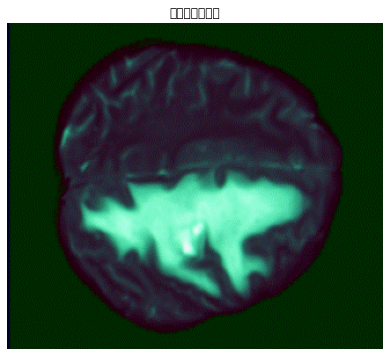

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取灰度图像（1×4 拼接图）
img = cv2.imread('brats_png.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("图像读取失败，请检查文件路径")
else:
    # 获取图像尺寸（假设四个子图宽度相等）
    height, total_width = img.shape
    w = total_width // 4  # 每张子图的宽度

    # 分割图像，提取第2、3、4张作为 R、G、B 通道
    img_R = img[:, w:2*w]   # 第2张图 -> 红色通道
    img_G = img[:, 2*w:3*w] # 第3张图 -> 绿色通道
    img_B = img[:, 3*w:4*w] # 第4张图 -> 蓝色通道

    # 合并成 RGB 彩色图像
    rgb_img = np.dstack([img_R, img_G, img_B])
    
    # 使用 matplotlib 显示图像
    plt.figure(figsize=(8, 6))
    plt.imshow(rgb_img, cmap=None)  # 直接显示RGB图像
    plt.title("合成的彩色图像")
    plt.axis('off')
    plt.show()


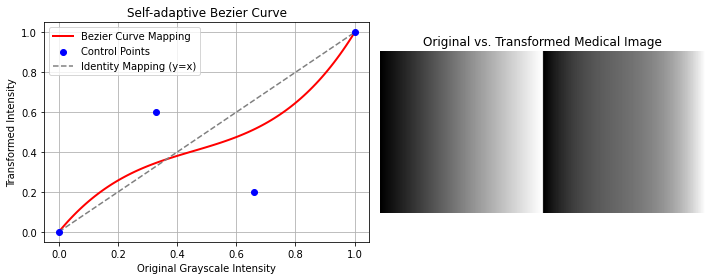

In [9]:
# 重新绘制符合论文要求的 Bezier 变换示意图
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 定义 Bezier 曲线函数
def bezier_curve(t, P0, P1, P2, P3):
    return (1 - t)**3 * P0 + 3 * t * (1 - t)**2 * P1 + 3 * t**2 * (1 - t) * P2 + t**3 * P3

# 定义控制点（可以调整不同的控制点来观察不同的映射效果）
P0, P1, P2, P3 = 0, 0.3, 0.7, 1

# 生成曲线数据
t_values = np.linspace(0, 1, 100)
mapped_values = bezier_curve(t_values, P0, P1, P2, P3)

# 原始灰度值（0-255）
original_gray = np.linspace(0, 255, 100)


# 固定 x 坐标
x_control = np.array([0, 0.33, 0.66, 1])

# 可学习的 y 坐标（可以调整以符合需求）
y_control = np.array([0, 0.6, 0.2, 1])  # 这里可以调整不同的 y 位置

# 计算 Bezier 曲线
t_values = np.linspace(0, 1, 100)
bezier_curve_values = bezier_curve(t_values, *y_control)

# 生成示例医学图像
gray_image = np.tile(np.linspace(0, 1, 100), (100, 1))

# 变换图像
transformed_image = bezier_curve(gray_image, *y_control)

# 创建可视化
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# 绘制 Bezier 曲线
ax[0].plot(t_values, bezier_curve_values, color="red", linewidth=2, label="Bezier Curve Mapping")
ax[0].scatter(x_control, y_control, color="blue", zorder=3, label="Control Points")
ax[0].plot(t_values, t_values, '--', color="gray", label="Identity Mapping (y=x)")
ax[0].set_xlabel("Original Grayscale Intensity")
ax[0].set_ylabel("Transformed Intensity")
ax[0].set_title("Self-adaptive Bezier Curve")
ax[0].legend()
ax[0].grid(True)

# 显示医学图像转换效果
ax[1].imshow(np.hstack([gray_image, transformed_image]), cmap="gray")
ax[1].set_title("Original vs. Transformed Medical Image")
ax[1].axis("off")

plt.tight_layout()
plt.savefig("bezier_transformation.png", dpi=800, bbox_inches='tight')
plt.show()


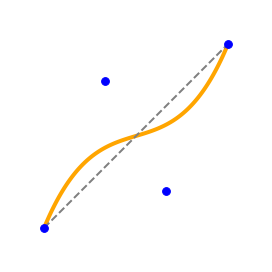

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

def bezier_curve(t, P0, P1, P2, P3):
    return (1 - t)**3 * P0 + 3 * t * (1 - t)**2 * P1 + 3 * t**2 * (1 - t) * P2 + t**3 * P3

# 固定 x 坐标
x_control = np.array([0, 0.33, 0.66, 1.0])
# 可学习的 y 坐标（示例）
y_control = np.array([0.0, 0.8, 0.2, 1.0])


t_values = np.linspace(0, 1, 100)
bezier_values = bezier_curve(t_values, *y_control)

# 创建画布
fig, ax = plt.subplots(figsize=(4,4))

# 绘制 Bezier 曲线 (红色)
ax.plot(t_values, bezier_values, color="orange", linewidth=4)
# 绘制控制点 (蓝色散点)
ax.scatter(x_control, y_control, color="blue", zorder=3, s=60)
# 绘制对角线 (y = x, 灰色虚线)
ax.plot(t_values, t_values, '--', color="gray", linewidth=2)

# 隐藏坐标轴刻度、边框、网格
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# 限制坐标范围 (可根据需求调节)
ax.set_xlim(-0.2,1.2)
ax.set_ylim(-0.2 ,1.2)

plt.tight_layout()
plt.savefig("bezier_transformation_minimal1.png", dpi=800, bbox_inches='tight')
plt.show()


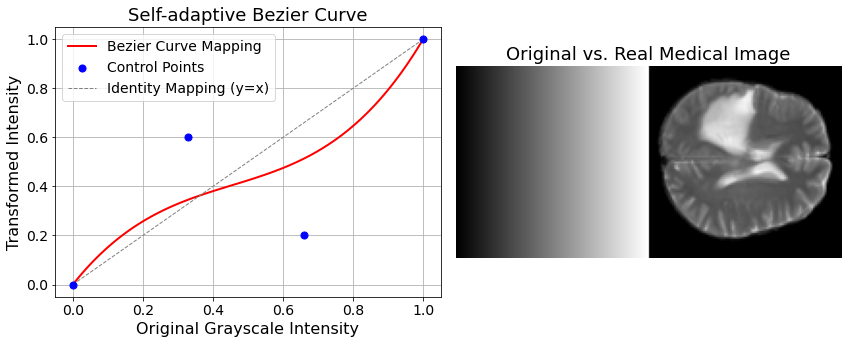

(-0.5, 199.5, 99.5, -0.5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
from PIL import Image

# 定义 Bezier 曲线函数
def bezier_curve(t, P0, P1, P2, P3):
    return (1 - t)**3 * P0 + 3 * t * (1 - t)**2 * P1 + 3 * t**2 * (1 - t) * P2 + t**3 * P3

# 定义控制点（可以调整不同的控制点来观察不同的映射效果）
P0, P1, P2, P3 = 0, 0.3, 0.7, 1

# 生成曲线数据
t_values = np.linspace(0, 1, 100)
mapped_values = bezier_curve(t_values, P0, P1, P2, P3)

# 固定 x 坐标
x_control = np.array([0, 0.33, 0.66, 1])
# 可学习的 y 坐标（可以调整以符合需求）
y_control = np.array([0, 0.6, 0.2, 1])  # 这里可以调整不同的 y 位置

# 计算 Bezier 曲线
bezier_curve_values = bezier_curve(t_values, *y_control)

# 生成示例医学图像（左侧）: 这里依然用生成的灰度图
gray_image = np.tile(np.linspace(0, 1, 100), (100, 1))

# 变换图像
transformed_image = bezier_curve(gray_image, *y_control)

# 读取真实医学图像作为右侧示例 (假设文件名为 "real_medical.png")
# 请确保该图片为灰度图，如果不是，可转换为灰度
real_img = plt.imread("shiliimg.png")
if real_img.ndim == 3:
    # 转换为灰度图：简单加权平均
    real_img = np.dot(real_img[...,:3], [0.2989, 0.5870, 0.1140])
# 如果像素值不在 [0,1] 内，则归一化
if real_img.max() > 1:
    real_img = real_img / 255.0

# 设置全局字体大小
plt.rcParams.update({'font.size': 14})

# 创建可视化，设置较大的字体
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 绘制 Bezier 曲线
ax[0].plot(t_values, bezier_curve_values, color="red", linewidth=2, label="Bezier Curve Mapping")
ax[0].scatter(x_control, y_control, color="blue", zorder=3, s=50, label="Control Points")
ax[0].plot(t_values, t_values, '--', color="gray", linewidth=1, label="Identity Mapping (y=x)")
ax[0].set_xlabel("Original Grayscale Intensity", fontsize=16)
ax[0].set_ylabel("Transformed Intensity", fontsize=16)
ax[0].set_title("Self-adaptive Bezier Curve", fontsize=18)
ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].grid(True)

# 显示真实医学图像转换效果
# 在这里，将真实图片与原始灰度图拼接对比
# 注意：这里将真实图片的尺寸与生成的灰度图对齐
# real_img_resized = np.array(Image.fromarray((real_img*255).astype(np.uint8)).resize((gray_image.shape[1], gray_image.shape[0])))
# combined_img = np.hstack([gray_image, real_img_resized/255.0])
# ax[1].imshow(combined_img, cmap="gray")
# ax[1].set_title("Original vs. Real Medical Image", fontsize=18)
# ax[1].axis("off")

# plt.tight_layout()
# plt.savefig("bezier_transformation.png", dpi=800, bbox_inches='tight')
# plt.show()

# 读取真实医学图像作为右侧示例 (假设文件名为 "shiliimg.png")
real_img = plt.imread("shiliimg.png")
if real_img.ndim == 3:
    # 转换为灰度图：简单加权平均
    real_img = np.dot(real_img[...,:3], [0.2989, 0.5870, 0.1140])
# 如果像素值不在 [0,1] 内，则归一化
if real_img.max() > 1:
    real_img = real_img / 255.0

# 调整真实图像大小以匹配示例图 (100x100)
real_img_resized = np.array(Image.fromarray((real_img*255).astype(np.uint8)).resize((gray_image.shape[1], gray_image.shape[0])))/255.0

# 根据 Bezier 曲线对真实图像进行变换
transformed_real = bezier_curve(real_img_resized, *y_control)

# 拼接原图与变换后的图像（左右拼接）
combined_img = np.hstack([real_img_resized, transformed_real])
ax[1].imshow(combined_img, cmap="gray")
ax[1].set_title("Original vs. Transformed Image", fontsize=18)
ax[1].axis("off")


# 在个代码中，右边展示的是origin image和transform image
# 我的意思是，把real_img = plt.imread("shiliimg.png")作为original image
# 然后transform image需要根据曲线，把这个图像变换一下

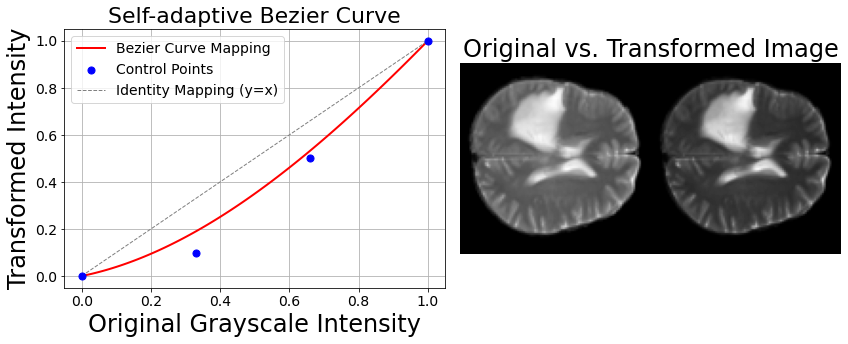

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
from PIL import Image

# 定义 Bezier 曲线函数
def bezier_curve(t, P0, P1, P2, P3):
    return (1 - t)**3 * P0 + 3 * t * (1 - t)**2 * P1 + 3 * t**2 * (1 - t) * P2 + t**3 * P3

# 定义控制点（可以调整不同的控制点来观察不同的映射效果）
P0, P1, P2, P3 = 0,0.1,0.5, 1

# 生成曲线数据
t_values = np.linspace(0, 1, 100)
bezier_curve_values = bezier_curve(t_values, P0, P1, P2, P3)

# 固定 x 坐标
x_control = np.array([0.0, 0.33, 0.66, 1.0])
# 可学习的 y 坐标（可以调整以符合需求）
y_control = np.array([0,0.1,0.5, 1])  # 这里可以调整不同的 y 位置

# 绘制示意图左侧：Bezier 曲线
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(t_values, bezier_curve_values, color="red", linewidth=2, label="Bezier Curve Mapping")
ax[0].scatter(x_control, y_control, color="blue", zorder=3, s=50, label="Control Points")
ax[0].plot(t_values, t_values, '--', color="gray", linewidth=1, label="Identity Mapping (y=x)")
ax[0].set_xlabel("Original Grayscale Intensity", fontsize=24)
ax[0].set_ylabel("Transformed Intensity", fontsize=24)
ax[0].set_title("Self-adaptive Bezier Curve", fontsize=22)
ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].grid(True)

# 右侧：真实医学图像的变换效果
# 读取真实医学图像（假设文件名为 "shiliimg.png"）
real_img = plt.imread("shiliimg.png")
if real_img.ndim == 3:
    # 转换为灰度图：简单加权平均
    real_img = np.dot(real_img[...,:3], [0.2989, 0.5870, 0.1140])
# 如果像素值不在 [0,1] 内，则归一化
if real_img.max() > 1:
    real_img = real_img / 255.0

# 调整真实图像大小，使其与示例图尺寸匹配（例如100x100）
real_img_resized = np.array(Image.fromarray((real_img*255).astype(np.uint8)).resize((100, 100)))/255.0

# 根据 Bezier 曲线对真实图像进行变换
transformed_image = bezier_curve(real_img_resized, *y_control)

# 拼接原始图像和变换后的图像（左右拼接）
combined_img = np.hstack([real_img_resized, transformed_image])
ax[1].imshow(combined_img, cmap="gray")
ax[1].set_title("Original vs. Transformed Image", fontsize=24)
ax[1].axis("off")

plt.tight_layout()
plt.savefig("bezier_transformation.png", dpi=800, bbox_inches='tight')
plt.show()


In [62]:
import pandas as pd

dataset = 'BraTS_PED_t2f_2D'
# dataset = 'mbh'
my_method = f'output/wjh_tta_nonl_001_iccv/{dataset}/{dataset}-box-test-results.csv'
# my_method = f'output/wjh_tta_nonl_001_iccv/{dataset}/{dataset}-box-test-results.csv'

other1 = f'output/source-only_tta/{dataset}/{dataset}-box-test-results.csv'
other2 = f'output/mt_tta/{dataset}/{dataset}-box-test-results.csv'
other3 = f'output/upl_tta/{dataset}/{dataset}-box-test-results.csv'


df_my = pd.read_csv(my_method)         #
df_other1 = pd.read_csv(other1)
df_other2 = pd.read_csv(other2)
df_other3 = pd.read_csv(other3)

# Rename columns to indicate method-specific values.
df_my = df_my.rename(columns={'Dice': 'Dice_my', 'ASSD': 'ASSD_my', 'HD95': 'HD95_my'})
df_other1 = df_other1.rename(columns={'Dice': 'Dice_1', 'ASSD': 'ASSD_1', 'HD95': 'HD95_1'})
df_other2 = df_other2.rename(columns={'Dice': 'Dice_2', 'ASSD': 'ASSD_2', 'HD95': 'HD95_2'})
df_other3 = df_other3.rename(columns={'Dice': 'Dice_3', 'ASSD': 'ASSD_3', 'HD95': 'HD95_3'})

# Merge all dataframes on 'basename'
df = df_my.merge(df_other1, on='basename') \
          .merge(df_other2, on='basename') \
          .merge(df_other3, on='basename')

# Compute the combined metric for each method:
# We assume a lower metric is better (high DSC and low HD95)
df['metric_my'] = 0.7 * df['Dice_my'] + 0.3 * df['HD95_my']
df['metric_1'] = 0.7 * df['Dice_1'] + 0.3 * df['HD95_1']
df['metric_2'] = 0.7 * df['Dice_2'] + 0.3 * df['HD95_2']
df['metric_3'] = 0.7 * df['Dice_3'] + 0.3 * df['HD95_3']

# Compute the average metric for the other methods
df['metric_others'] = (df['metric_1'] + df['metric_2'] + df['metric_3']) / 3.0

# Compute the difference: a higher positive difference means your method performs better relative to others.
df['diff'] = df['metric_others'] - df['metric_my']

# Select the top 5 samples where your method outperforms the others the most
best_samples = df.sort_values(by='diff', ascending=False).head(15)

print("Top 5 best samples for visualization:")
print(best_samples[['basename', 'Dice_my', 'HD95_my', 'metric_my', 'metric_others', 'diff']])


Top 5 best samples for visualization:
                          basename   Dice_my    HD95_my  metric_my  \
1002  BraTS-PED-00110-000-t2f_0081  0.916164   3.605551   1.722980   
18    BraTS-PED-00113-000-t2f_0085  0.915219   6.000000   2.440653   
764   BraTS-PED-00142-000-t2f_0066  0.888799   7.211103   2.785490   
1211  BraTS-PED-00055-000-t2f_0069  0.939961   1.000000   0.957973   
439   BraTS-PED-00026-000-t2f_0102  0.962027   0.000000   0.673419   
297   BraTS-PED-00026-000-t2f_0103  0.962218   0.000000   0.673553   
505   BraTS-PED-00026-000-t2f_0100  0.957910   0.000000   0.670537   
1074  BraTS-PED-00119-000-t2f_0061  0.883795   3.605551   1.700322   
621   BraTS-PED-00026-000-t2f_0099  0.954494   0.000000   0.668146   
931   BraTS-PED-00026-000-t2f_0106  0.956725   0.000000   0.669708   
257   BraTS-PED-00009-000-t2f_0043  0.911731   5.000000   2.138212   
644   BraTS-PED-00010-000-t2f_0070  0.950632   0.000000   0.665443   
380   BraTS-PED-00127-000-t2f_0016  0.936094   1.414

In [63]:
import os
import shutil
import pandas as pd

# Example dataset and sample_name (you can update sample_name from your best_samples result)
# dataset = 'BraTS_PED_t2w_2D'
# sample_name is obtained from your best_samples, e.g.,:
# sample_name = best_samples.iloc[0]['sample_name']
sample_name = best_samples.iloc[0]['basename']

# sample_name = 'BraTS-SSA-00002-000-t2w_0105'
save_root = '/home/data/SAM/wesam/results'

# Define the directories for each method and the corresponding prefix for saving
folders = [
    (f'/home/data/SAM/wesam/output/source-only_tta/{dataset}/{dataset}-box-pred_masks', "source-only_tta"),
    (f'/home/data/SAM/wesam/output/mt_tta/{dataset}/{dataset}-box-pred_masks', "mt_tta"),
    (f'/home/data/SAM/wesam/output/upl_tta/{dataset}/{dataset}-box-pred_masks', "upl_tta"),
    (f'/home/data/SAM/wesam/output/cotta_tta/{dataset}/{dataset}-box-pred_masks', "cotta_tta"),
    (f'/home/data/SAM/wesam/output/medsam_tta/{dataset}/{dataset}-box-pred_masks', "medsam_tta"),
    # If there are duplicate directories, you can adjust the prefixes accordingly:
    (f'/home/data/SAM/wesam/output/source-only_tta/{dataset}/{dataset}-box-pred_masks', "source-only_tta2"),
    (f'/home/data/SAM/wesam/output/tent_tta/{dataset}/{dataset}-box-pred_masks', "tent_tta"),
    (f'/home/data/SAM/wesam/output/wesam_tta/{dataset}/{dataset}-box-pred_masks', "wesam_tta"),
    (f'/home/data/SAM/wesam/output/wjh_tta_nonl_001_iccv/{dataset}/{dataset}-box-pred_masks', "wjh_tta")
]

nii_root_img = '/home/data/SAM/wesam/data/BraTS_PED_t2f_2D/image'
nii_root_lab = '/home/data/SAM/wesam/data/BraTS_PED_t2f_2D/mask' # sample_name + .nii.gz

# Create the save_root directory if it doesn't exist
os.makedirs(save_root, exist_ok=True)

# Process each folder: locate the file, then copy with a unique prefix.
for folder, prefix in folders:
    src_file = os.path.join(folder, sample_name + ".png")
    dst_file = os.path.join(save_root, f"{prefix}_{sample_name}.png")
    try:
        shutil.copy(src_file, dst_file)
        print(f"Copied {src_file} to {dst_file}")
    except Exception as e:
        print(f"Error copying {src_file}: {e}")

# output/cotta_tta/BraTS_PED_t2f_2D/BraTS_PED_t2f_2D-box-pred_masks/BraTS-PED-00004-000-t2f_0045.png


Copied /home/data/SAM/wesam/output/source-only_tta/BraTS_PED_t2f_2D/BraTS_PED_t2f_2D-box-pred_masks/BraTS-PED-00110-000-t2f_0081.png to /home/data/SAM/wesam/results/source-only_tta_BraTS-PED-00110-000-t2f_0081.png
Copied /home/data/SAM/wesam/output/mt_tta/BraTS_PED_t2f_2D/BraTS_PED_t2f_2D-box-pred_masks/BraTS-PED-00110-000-t2f_0081.png to /home/data/SAM/wesam/results/mt_tta_BraTS-PED-00110-000-t2f_0081.png
Copied /home/data/SAM/wesam/output/upl_tta/BraTS_PED_t2f_2D/BraTS_PED_t2f_2D-box-pred_masks/BraTS-PED-00110-000-t2f_0081.png to /home/data/SAM/wesam/results/upl_tta_BraTS-PED-00110-000-t2f_0081.png
Copied /home/data/SAM/wesam/output/cotta_tta/BraTS_PED_t2f_2D/BraTS_PED_t2f_2D-box-pred_masks/BraTS-PED-00110-000-t2f_0081.png to /home/data/SAM/wesam/results/cotta_tta_BraTS-PED-00110-000-t2f_0081.png
Copied /home/data/SAM/wesam/output/medsam_tta/BraTS_PED_t2f_2D/BraTS_PED_t2f_2D-box-pred_masks/BraTS-PED-00110-000-t2f_0081.png to /home/data/SAM/wesam/results/medsam_tta_BraTS-PED-00110-000

In [59]:
import os
import nibabel as nib
import numpy as np
from PIL import Image

# Define the paths for the original images (NIfTI format)
nii_root_img = '/home/data/SAM/wesam/data/{}/image'.format(dataset)
nii_root_lab = '/home/data/SAM/wesam/data/{}/mask'.format(dataset)

# Assume sample_name is obtained from your previous selection (using basename from CSV)
# sample_name = 'BraTS-SSA-00002-000-t2w_0105'

# Construct the full paths to the NIfTI files
nii_img_path = os.path.join(nii_root_img, sample_name + '.nii.gz')
nii_lab_path = os.path.join(nii_root_lab, sample_name + '.nii.gz')

# Load the NIfTI files using nibabel
img_nii = nib.load(nii_img_path)
lab_nii = nib.load(nii_lab_path)

# Extract data as numpy arrays
img_data = img_nii.get_fdata()
lab_data = lab_nii.get_fdata()

# Ensure the images are 2D; if they are 3D with one slice, extract the slice.
if img_data.ndim == 3:
    # If the third dimension is 1, squeeze it.
    if img_data.shape[-1] == 1:
        img_data = np.squeeze(img_data, axis=-1)
    else:
        raise ValueError("Expected 2D image or 3D image with a single slice.")
if lab_data.ndim == 3:
    if lab_data.shape[-1] == 1:
        lab_data = np.squeeze(lab_data, axis=-1)
    else:
        raise ValueError("Expected 2D label or 3D label with a single slice.")

# Normalize the image data to [0,255] and convert to uint8
def normalize_to_uint8(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    if arr_max - arr_min > 1e-8:
        arr_norm = (arr - arr_min) / (arr_max - arr_min)
    else:
        arr_norm = np.zeros_like(arr)
    return (arr_norm * 255).astype(np.uint8)

img_uint8 = normalize_to_uint8(img_data)
lab_uint8 = normalize_to_uint8(lab_data)

# Define the save directory and create it if it doesn't exist
save_root = '/home/data/SAM/wesam/results'
os.makedirs(save_root, exist_ok=True)

# Define the output file paths with the desired prefixes
img_save_path = os.path.join(save_root, f"img_{sample_name}.png")
lab_save_path = os.path.join(save_root, f"lab_{sample_name}.png")

# Save the images using PIL
Image.fromarray(img_uint8).save(img_save_path)
Image.fromarray(lab_uint8).save(lab_save_path)

print(f"Saved original image as '{img_save_path}'")
print(f"Saved label as '{lab_save_path}'")


Saved original image as '/home/data/SAM/wesam/results/img_BraTS-PED-00110-000-t2f_0081.png'
Saved label as '/home/data/SAM/wesam/results/lab_BraTS-PED-00110-000-t2f_0081.png'


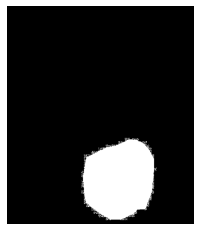

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the grayscale image (assumed to have values in [0,1])
img = Image.open("/home/data/SAM/wesam/data/PraNet/mask/Kvasir_cju2yv4imv6cz099314jveiib.png").convert("L")
img_arr = np.array(img, dtype=np.float32)

# Check if the image is in [0,1] range and convert it to [0,255]
if img_arr.max() <= 1.0:
    img_uint8 = (img_arr * 255).astype(np.uint8)
else:
    img_uint8 = img_arr.astype(np.uint8)

# Display the image
plt.imshow(img_uint8, cmap="gray")
plt.axis("off")
plt.show()


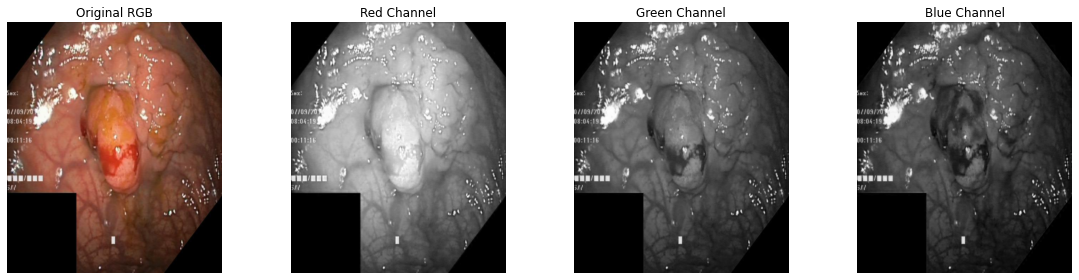

In [67]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 读取RGB图像
img = Image.open('/home/data/SAM/wesam/data/PraNet/image/Kvasir_cju1bm8063nmh07996rsjjemq.png') # 替换成你的图片路径
img_np = np.array(img)

# 提取RGB通道
R_channel = img_np[:, :, 0]
G_channel = img_np[:, :, 1]
B_channel = img_np[:, :, 2]

# 创建画布，1行4列
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# 原始彩色图
axes[0].imshow(img_np)
axes[0].set_title('Original RGB')
axes[0].axis('off')

# R通道灰度图
axes[1].imshow(R_channel, cmap='gray')
axes[1].set_title('Red Channel')
axes[1].axis('off')

# G通道灰度图
axes[2].imshow(G_channel, cmap='gray')
axes[2].set_title('Green Channel')
axes[2].axis('off')

# B通道灰度图
axes[3].imshow(B_channel, cmap='gray')
axes[3].set_title('Blue Channel')
axes[3].axis('off')

plt.tight_layout()
plt.show()


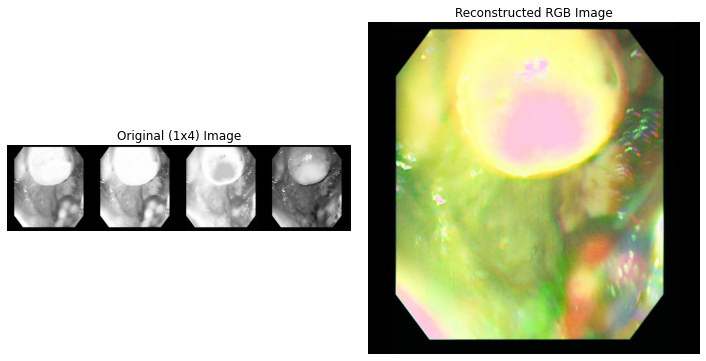

In [71]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 输入图片路径
# input_image_path = 'input_image.png'  # 替换成你的图片路径
input_image_path = '/home/data/SAM/wesam/show_4img/CVC-ColonDB_328.png' # 替换成你的图片路径


# 加载图片
img = Image.open(input_image_path).convert('RGB')
img_np = np.array(img)

# 获取输入图片的宽度和高度
h, w, _ = img_np.shape
single_w = w // 4  # 每个子图的宽度

# 提取第2、3、4个子图作为灰度图
gray_R = img_np[:, single_w:single_w*2, 0]
gray_G = img_np[:, single_w*2:single_w*3, 0]
gray_B = img_np[:, single_w*3:single_w*4, 0]

# 合并三个灰度图像为新的RGB图像
reconstructed_img = np.stack([gray_R, gray_G, gray_B], axis=2)

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_np)
axes[0].set_title('Original (1x4) Image')
axes[0].axis('off')

axes[1].imshow(reconstructed_img)
axes[1].set_title('Reconstructed RGB Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()
